In [ ]:
!unzip /content/drive/MyDrive/sampled_texts.zip -d my_data

In [ ]:
!pip install -U sentence-transformers

In [5]:
import numpy as np
import nltk
import os
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
from nltk.stem import WordNetLemmatizer
import pandas as pd
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


In [6]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('omw-1.4')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [7]:
texts = []
for filename in os.listdir('/content/my_data/sampled_texts'):
    file = os.fsdecode(filename)
    with open(f'/content/my_data/sampled_texts/{file}') as f:
        texts.append(f.read())

In [8]:
texts[:5]

['Topic: Microsoft investigates Windows Server flaw\n\nText: Microsoft is investigating a security flaw in Windows server software that could allow an attacker to gain complete control over systems running the software, the company said.',
 'Topic: Newfound Comet Set for Winter Display (SPACE.com)\n\nText: SPACE.com - Donald Machholz of Colfax, \\  California, an optician who has been interested in astronomy since age eight, \\  discovered nine comets from 1978 through 1994. He has since spent 1,457 hours \\  scanning the skies for other comets, without any luck.',
 'Topic: Half-Life 2 users bitten by bugs\n\nText: Several Half-Life 2 users who finally got the long-delayed game into their hands yesterday got exactly what they didn #39;t want--more delays.',
 'Topic: Vodafone Peddles New BlackBerry\n\nText: Research In Motion #39;s BlackBerry 7100v, which sports the company #39;s latest keyboard technology, is being offered exclusively through Vodafone.',
 'Topic: Lehmann gives evidence

Посмотрим на наши данные, видно что в текстах присутствует заголовок, удалим его, также удалим цифры и прочие знаки.

# Preprocess text

In [9]:
def clean_header(text):
    end_topic = text.index('\n') + 8
    text = text.replace(text[:end_topic], '')
    return text

In [10]:
patterns = "[0-9!#$%&'()*+,./:;<=>?@[\]^_`{|}~—\"\-]+"
lemmatizer = WordNetLemmatizer()

def preprocessing_text(text):
    text = re.sub(patterns, ' ', text).lower()
    return text

In [11]:
clean_texts = []
for text in texts:
    clean_texts.append(preprocessing_text(clean_header(text)))

In [12]:
# Функция для визуализации на плоскости с помощью рса
def visualization(embeds, labels):
    pca = PCA(n_components=2)
    pca_embed = pca.fit_transform(embeds)

    unique_labels = np.unique(labels)

    color_map = {label: f'C{i}' for i, label in enumerate(unique_labels)}

    for label in unique_labels:
        cluster_indices = np.where(labels == label)[0]
        plt.scatter(pca_embed[cluster_indices, 0], pca_embed[cluster_indices, 1], color=color_map[label], label=f'Кластер {label}')

    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.title('PCA')
    plt.legend()

    plt.show()

In [13]:
# Метод локтя
def elbow_method(embeds, N):
    wcss = []
    for i in range(2, N+1):
        cluster = KMeans(n_clusters=i, init='k-means++', random_state=42)
        cluster.fit(embeds)
        wcss.append(cluster.inertia_)
    plt.plot(range(2, N+1), wcss)
    plt.title('Метод локтя')
    plt.show()

# Метод силуэта
def silhouette_method(embeds, N):
    wcss = []
    for i in range(2, N+1):
        cluster = KMeans(n_clusters=i, init='k-means++', random_state=42)
        cluster.fit(embeds)
        wcss.append(silhouette_score(embeds, cluster.labels_, metric='euclidean'))
    plt.plot(range(2, N+1), wcss)
    plt.title('Метод силуэта')
    plt.show()

In [14]:
# Функция для просмотра отдельно получившихся кластеров
def view_cluster(num_cluster, df):
    return df[df['cluster'] == num_cluster]['text']

In [15]:
def cluster_distribution(labels):
    unique, counts = np.unique(labels, return_counts=True)
    plt.bar(unique, counts)
    plt.show()

# Sentence-transformers

In [16]:
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.73k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/314 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Получаем эмбеддинги наших текстов

In [17]:
embeds = []
for text in clean_texts:
    embeds.append(model.encode(text))
embeds = np.array(embeds)

In [18]:
embeds.shape

(200, 384)

# K-means

Для начала воспользуемся самым простым алгоритмом кластеризации, попробуем определить количество кластеров, посмотрев графики метода локтя и метода силуэтов.

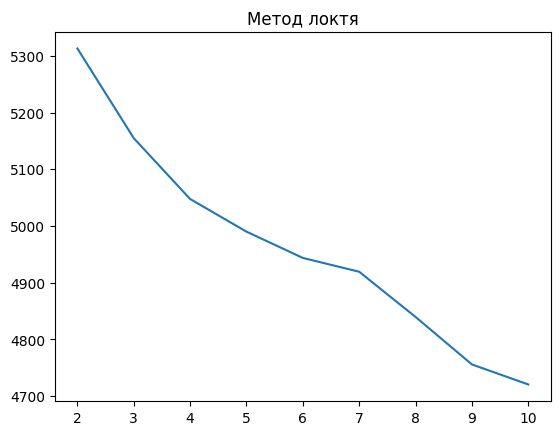

In [23]:
elbow_method(embeds, 10)

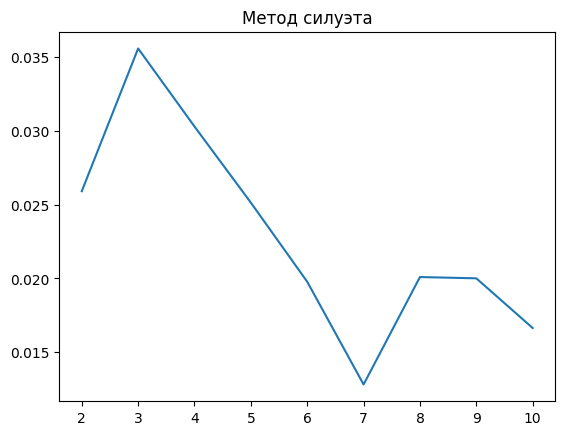

In [22]:
silhouette_method(embeds, 10)

Метод локтя ничего не показывает, а метод силуэта выдает максимальное значение на 3 кластерах, возьмем это значение за основного.

In [24]:
n_clusters = 3
cluster = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
cluster.fit(embeds)

labels = cluster.labels_
labels

array([0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 2, 0, 1, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 2, 1, 0, 0, 0, 1, 0, 2, 1, 1, 0, 1, 2, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 2, 1, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2,
       0, 1, 2, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 2,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 2, 0, 0, 1,
       0, 1, 0, 1, 0, 2, 0, 0, 0, 0, 2, 0, 2, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0], dtype=int32)

Посмотрим на распределения кластеров

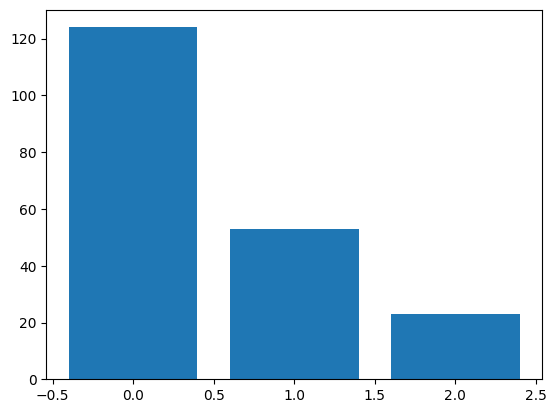

In [25]:
cluster_distribution(labels)

Посмотрим на результат второго кластера.
Стоит отметить, что интерпретировать результат будет трудно, кластеры достаточно большого размера

In [26]:
df = pd.DataFrame({'text': [texts[i] for i in range(len(embeds))], 'cluster': labels})
for i, text in enumerate(view_cluster(2, df)):
    print(i+1)
    print(text)
    print()

1
Topic: Concert blast investigated

Text: ISTANBUL, Turkey Turkish authorities say a grenade might have caused last night #39;s explosion that injured at least 13 people attending a pop concert.

2
Topic: US bolsters force for Afghan poll

Text: The US is to send up to 1,100 extra troops to Afghanistan to provide security for next month's elections.

3
Topic: Fears grow for Falluja civilians

Text: Iraqis trapped in the besieged rebel city of Falluja face a humanitarian disaster, aid agencies warn.

4
Topic: Leading Cuban Dissident Writer Freed

Text: Cuba #39;s communist government freed dissident writer Raul Rivero from prison Tuesday, the latest in a series of releases apparently aimed at cleaning up the island #39;s human rights record.

5
Topic: Explosion Rocks Baghdad Neighborhood

Text: BAGHDAD, Iraq, August 24 -- A car bomb exploded near the gate of a US-funded Iraqi television network in Baghdad on Tuesday, killing at least two people and wounding two others, authorities and 

Посмотрим на визуализацию кластеризации. Для этого понизим размерность эмбеддингов с помощью алгоритма PCA.

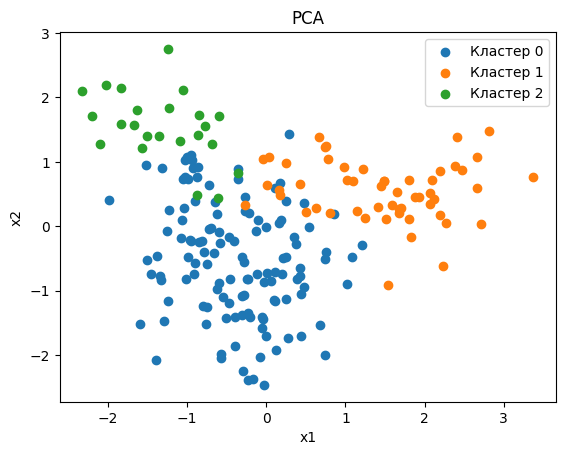

In [27]:
visualization(embeds, labels)

# DB-SCAN

Попробуем другой алгоритм кластеризации, который не требует знания о количестве кластеров.

In [28]:
cluster = DBSCAN(eps=5.8, min_samples=4)
cluster.fit(embeds)
labels = cluster.labels_
labels

array([-1,  0,  0, -1, -1, -1, -1, -1, -1,  0, -1,  0, -1, -1,  0, -1, -1,
       -1,  0,  0,  2, -1,  0, -1, -1,  1,  0,  0, -1, -1, -1, -1,  0,  0,
        0, -1, -1, -1, -1, -1, -1,  0, -1, -1,  0, -1, -1,  0, -1, -1,  3,
        0,  0, -1, -1, -1, -1, -1, -1,  0,  0,  0, -1, -1,  0, -1, -1, -1,
       -1, -1,  0, -1,  0, -1, -1, -1, -1, -1,  0,  0,  0, -1, -1, -1, -1,
       -1,  1,  1, -1, -1,  0,  3, -1, -1,  0,  1, -1, -1, -1, -1,  2,  0,
        0, -1, -1, -1, -1, -1,  0, -1, -1, -1,  0,  0, -1, -1, -1, -1,  0,
       -1,  0, -1, -1,  0, -1,  0, -1, -1, -1, -1, -1,  3,  0,  0, -1, -1,
        0,  0, -1, -1,  0,  0,  0, -1, -1, -1,  0, -1, -1, -1,  0, -1,  0,
       -1, -1, -1,  0, -1,  0, -1,  0, -1,  0, -1,  0, -1, -1,  0, -1, -1,
        0,  0, -1,  0, -1,  0,  0, -1, -1, -1,  0,  3,  0, -1, -1, -1, -1,
       -1, -1, -1, -1, -1,  0, -1, -1, -1, -1,  0, -1,  0])

<BarContainer object of 5 artists>

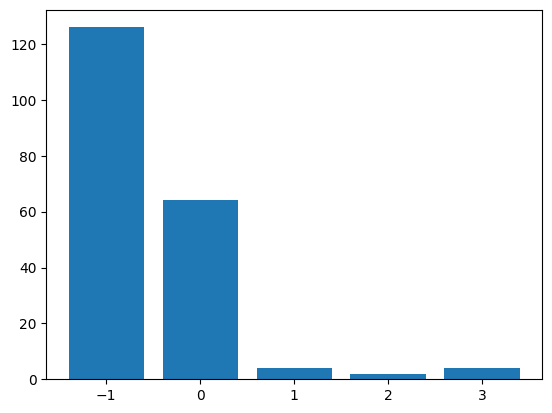

In [29]:
unique, counts = np.unique(labels, return_counts=True)
plt.bar(unique, counts)

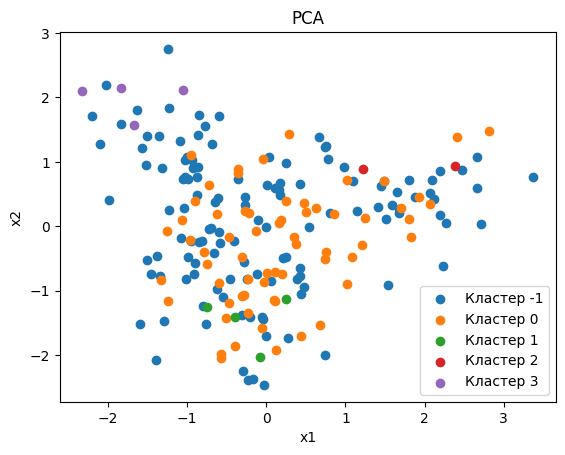

In [30]:
visualization(embeds, labels)

После визуализации видно, что кластеры разделились не так очевидно как при K-means.

In [31]:
df = pd.DataFrame({'text': [texts[i] for i in range(len(embeds))], 'cluster': labels})
for i, text in enumerate(view_cluster(3, df)):
    print(i+1)
    print(text)
    print()

1
Topic: Fears grow for Falluja civilians

Text: Iraqis trapped in the besieged rebel city of Falluja face a humanitarian disaster, aid agencies warn.

2
Topic: Militants Kidnap Relatives of Iraqi Minister-TV

Text: Militants have kidnapped two relatives of Iraqi Defense Minister Hazim al-Shalaan and demanded US forces leave the holy city of Najaf, Al Jazeera television reported Wednesday.

3
Topic: Kidnappers Release Seven Hostages in Iraq

Text: BAGHDAD, Iraq - Kidnappers released two female Italian aid workers and five other hostages Tuesday, raising hopes for at least 18 foreigners still in captivity. But insurgents showed no sign of easing their blood-soaked campaign against the U.S...

4
Topic: Italian troops  #39;to stay in Iraq #39;

Text: Italy says it has no intention of withdrawing its 3,000 troops from Iraq in the face of demands from kidnappers who have seized an Italian journalist.



Полученные кластеры уже можно интерпритировать, например данный кластер собрал все новости про военные действия в Ираке.

# Classification

In [32]:
def classifier(text, embeds):
    text = preprocessing_text(text)
    new_text_embed = model.encode(text)
    index_predict = np.argmax(cosine_similarity(new_text_embed.reshape(1, -1), embeds))
    return labels[index_predict]

Сгенерируем текст про военные действия в Ираке.

In [33]:
new_text = 'US forces have officially withdrawn from Iraq, marking the end of a long and controversial military presence. The withdrawal comes after years of war and conflict, leaving behind a fragile government and a country still facing numerous challenges.'

In [34]:
classifier(new_text, embeds)

3